## Project - Applying Data Science Methodology on Red Wine Quality Dataset
## Mohamad Masarani 
## Student #: 217303611
## EECS 4404: Introduction to Machine Learning and Pattern Recognition
### Project 3
#### Credit to professor Archit Garg's lectures and Notebooks provided. 
<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

Answer: Diagnostic Approach. I think this is the right approach as we need to perform statistical analysis to determine the weigh and effect of each feature of our dataset. Furthermore, knowing exactly what feature is contributing to the quality of wine is vital and determining why that feature is important would help producers and manufacturers make smarter, well-informed choices in order to increase the quality of their wine and yield better results. We will also use this approach to diagonose what features are related using statistical analysis and possibly interpret our data in a better way to generate informative insights. 

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Answer: We'd require data that's sampled properly and doesn't contain large inconsistency. To be more specific, we need data that breaks down the ingredient in each sample obtained and how much each ingredient contributes to the overall composition of the sampled red wine. For instance, red wine contains citric acid. We need measurements of citric acid and other parts of the wine to determine which ingredient is a key/important feature and which is not/weak. The quality of the wine is also provided which will help us understand and analyze what makes a great red wine, great!



### Data Collection

**Q3. From where do we get our data?**

Answer: Our red wine dataset is obtained and is available at the UCI machine learning archive (https://archive.ics.uci.edu/ml/datasets/wine+quality) and is supplied to us by Professor Archit Garg

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Answer: According to Google, the red wine samples are obtained from the north of Portugal.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Answer: knowing the impact of each variable can tremendously help producers etc. by providing them insights that will eventually help them better examine their production, distribution and overall business model. Furthermore, producers will be able to increase the quality of their wine by changing the the alcohol and other ingredient composition in their product to produce a better outcome and indirectly, a higher revenue. Hence, determining the impact of each variable is crucial and will surely drive greater results. 

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>: DONE, please refer to later parts of this notebook.
<li>Understand the data by carrying out any steps that you think are necessary</li>: DONE, please refer to later parts of this notebook.

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>: DONE
<li>Check for outliers if any and handle them</li>: DONE
<li>Implement Correlation heatmap</li>: DONE
<li>Check the distribution of data using histograms</li>: DONE
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>: DONE

We will start off by importing all of our dependencies/libraries such as pandas, numpy, sklearn models etc. 

In [42]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Let's now go ahead and import/read our data and see what columns we will be dealing with

In [43]:
dataset = pd.read_csv("winequality-red.csv")
dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As required, let's check out the shape of our dataset to understand how many rows and columns we have: 

In [44]:
dataset.shape

(1599, 12)

As we can see from the results above, it seems like we have 12 columns and 1599 entries(rows).
Now, let's call info() function to see if there exists any null values we need to deal with:

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [46]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

To further understand our data and identify how the data is distributed, let's call describe() and see metrics such as the mean, deviation, maximum. This will help us understand if we need to scale our data and identify outliers. One quick and brilliant way to identify outliers is to look at the difference between the percentiles such as 75% and compare it with others to see how far they are. 

In [47]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


After analyzing the data using describe(), I was able to spot and figure out if we have any outliers. 
I came to a realization that there exists a great difference between 75% and max in the column residual sugar, 2.6 and 15.5, respectively. 
In addition, the same thing applies for both free sulfur dioxide and total sulfur dioxide columns, accordingly. 


Hence, I'd like to analyze the skewness of the data using the function from pandas library skew(). 
Note that skewness is an indicator of the asymmetry of a random variable's probability density about its mean.

In [48]:
dataset.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Let's go ahead and plot residual sugar, free sulfur dioxide, and total sulfur dioxide

<AxesSubplot:xlabel='residual sugar'>

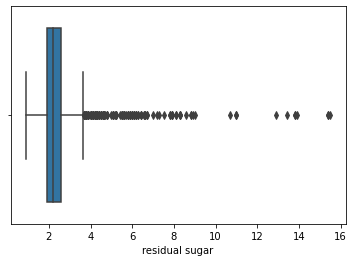

In [49]:
sns.boxplot(x=dataset['residual sugar'])

<AxesSubplot:xlabel='free sulfur dioxide'>

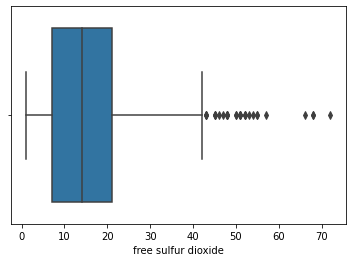

In [50]:
sns.boxplot(x=dataset['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

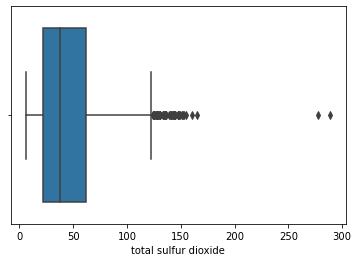

In [51]:
sns.boxplot(x=dataset['total sulfur dioxide'])

As we can see from above, there exists a few outliers in each of the features outlined above. Hence, we need to find to go a head and deal with those outliers in attempt to standardize our data and make it as neat as possible

In the code below, I will be plotting a boxplot for each feature in the same plot and replacing the outliers with the mean, accordingly. I believe this is a smarter choice in order to stay consistent

<AxesSubplot:>

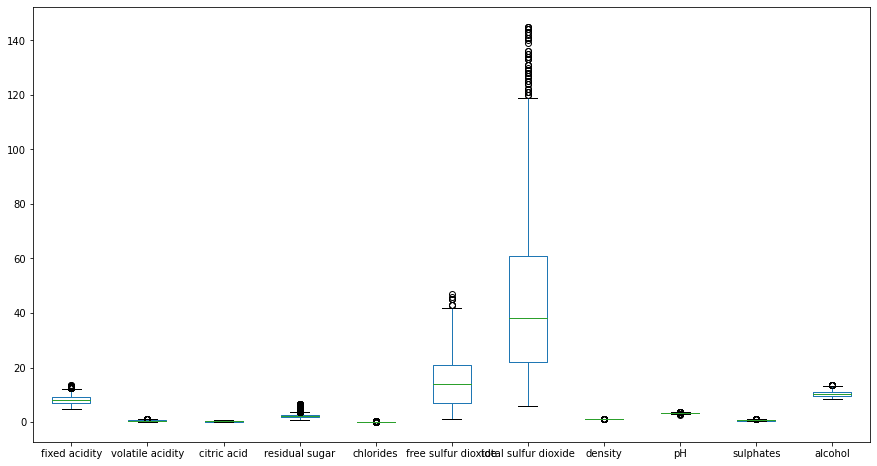

In [52]:
fig = plt.figure(figsize = (15,8))
thresh = 3
f1 = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides","free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]
for f in f1:
    mean = np.mean(dataset[f])
    std = np.std(dataset[f]) 
    for x in dataset[f]:
        z = (x-mean)/std
        if z > thresh:
            dataset[f] = dataset[f].replace(x,mean)
        
out = dataset.drop('quality', axis=1)
out.boxplot(grid=False)

In [53]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.271004,0.523460,0.270520,2.398633,0.082099,15.342869,45.315208,0.996704,3.308579,0.645528,10.404524,5.636023
std,1.645835,0.169903,0.193945,0.880654,0.022769,9.373486,30.331264,0.001814,0.149421,0.133713,1.032819,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996747,3.310000,0.620000,10.200000,6.000000
75%,9.150000,0.635000,0.420000,2.600000,0.089000,21.000000,61.000000,0.997800,3.400000,0.720000,11.033333,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


As you can see from above, we've successfully replaced the outliers with means and now have data that's much more consistent that before. For instance the difference between 75% and max in residual sugar was was higher with outliers compared to now. 

### Implementing a correlation heatmap

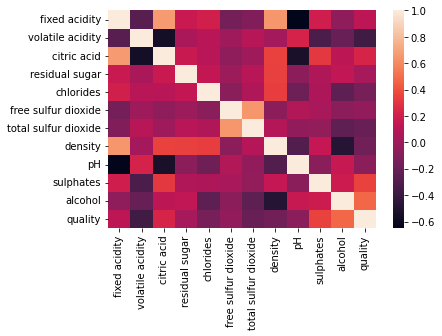

In [54]:
# A sample heatmap implementation for reference: 
sns.heatmap(dataset.corr());

#### The figure below is a sophisticated heatmap that outlines yet illustrates the relationship between our features

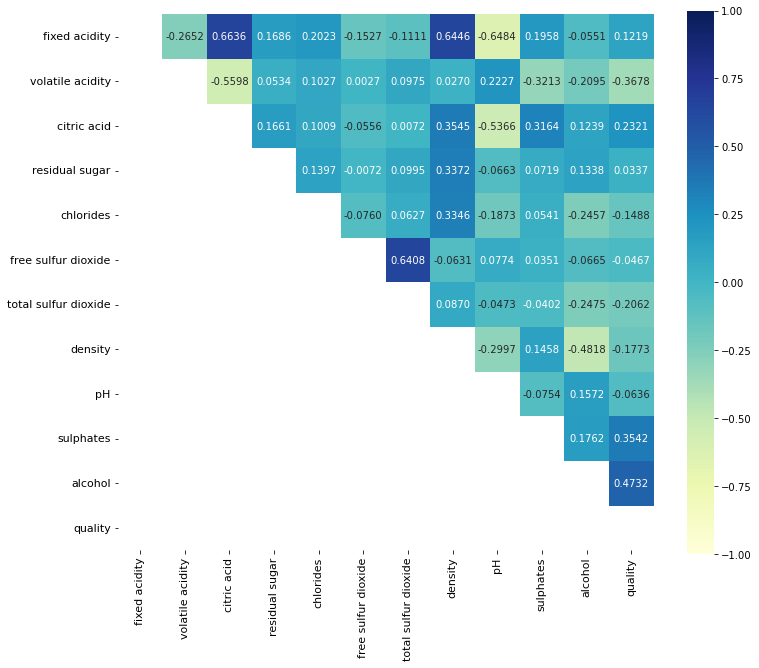

In [55]:
# tril returns a copy of an array with elements above the k-th diagonal zeroed. For arrays with ndim exceeding 2, tril will apply to the final two axes.
# https://numpy.org/doc/stable/reference/generated/numpy.tril.html
ButtonleftTri = np.tril(dataset.corr())
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), vmax=1, vmin=-1, square=True, annot=True, fmt='0.4f', 
            annot_kws={'size':10}, mask=ButtonleftTri, cmap="YlGnBu")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

From the heatmap implemented above, we can see the correlation between our column i.e. variables. I've set the boundaries for vmax and vmin to 1 and -1, respectively, in order to visualize how strong of a relationship a pair of variables have. Please note that a correlation of zero or close to zero indicates or point to no correlation. 
Since quality is our target, to illustrate, we can see that the square that intersects quality and residual sugar is close to zero. This might be an indicator that residual sugar has very little to no correlation with the wine quality (hypothesis). 
Moreoever, we can observe that quality has the highest positive correlation with alcohol and the highest negative correlation with volatile acidity. 
Finally, I'd like to make a final observation from this heatmap. By looking at the darker correlation squares, we can see that free sulfur dioxide and total sulfur dioxide have a correlation coeficient of 0.6408, which is high and close to vmax=1. This might be an indicator that we can drop one of them and combine them together since they're highly correlated. Same concept applies for fixed acidity and citric acid. But until know, we're just exploring our options. 

As per my hypothesis, I'm going to go ahead and drop the free sulfur dioxide column and retaining the total sulfur dioxide as I feel like they do point to the same thing.
Our aim is to make out data simple, but not too simple. If dropping this column induces future issues, I will be reconsidering this. However, let's carry on!

In [56]:
dataset = dataset.drop('free sulfur dioxide', axis=1)

In [57]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,102.0,0.9978,3.35,0.80,10.5,5


In [58]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.271004,0.523460,0.270520,2.398633,0.082099,45.315208,0.996704,3.308579,0.645528,10.404524,5.636023
std,1.645835,0.169903,0.193945,0.880654,0.022769,30.331264,0.001814,0.149421,0.133713,1.032819,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,38.000000,0.996747,3.310000,0.620000,10.200000,6.000000
75%,9.150000,0.635000,0.420000,2.600000,0.089000,61.000000,0.997800,3.400000,0.720000,11.033333,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


### Histograms

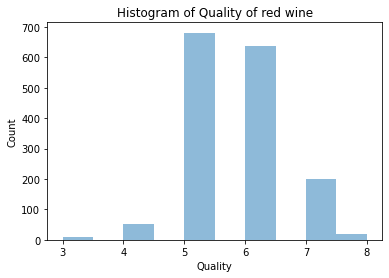

In [59]:
plt.hist(x='quality', data=dataset, alpha=0.5)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Histogram of Quality of red wine')
plt.show()

From the histogram above, we can see that the quality of sampled wine is majorly between 5-7. 

#### Now, let's take a further look into the histograms of each feature in our dataset, as required in project: 

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>]],
      dtype=object)

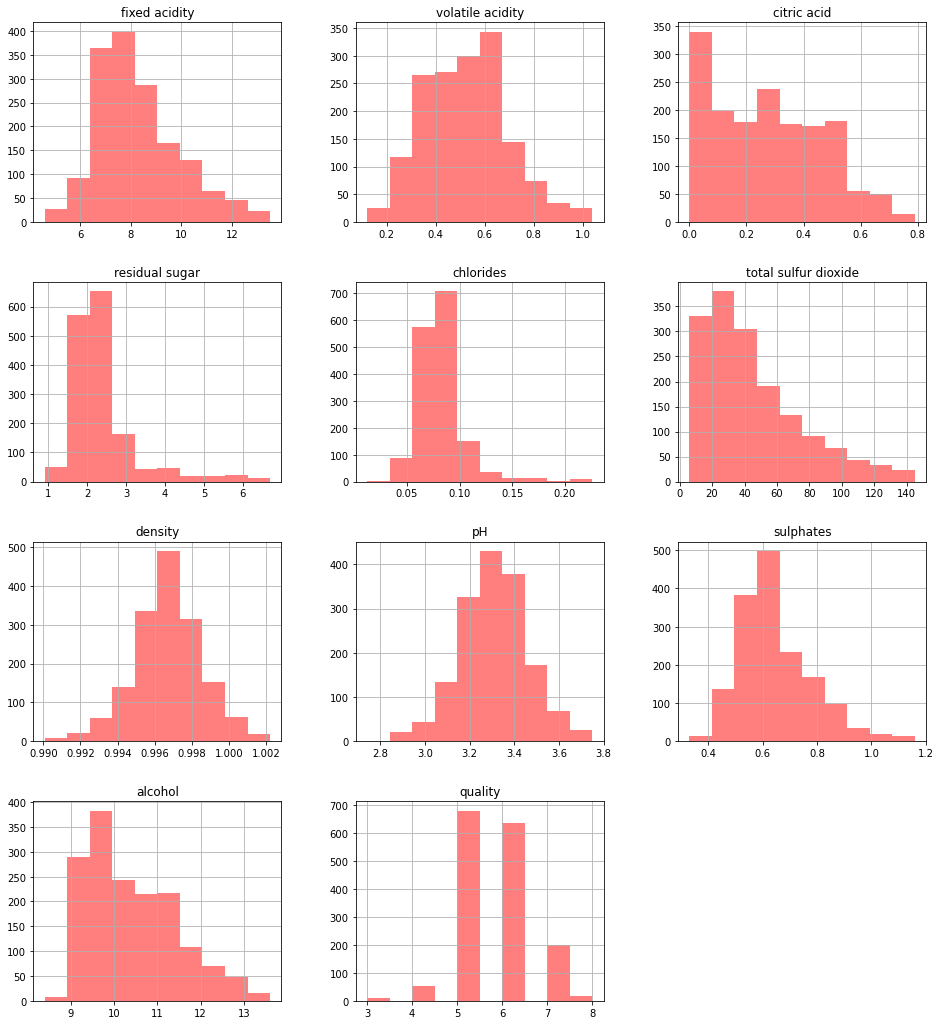

In [186]:
dataset.hist(figsize = (16,18), color='r', alpha=0.5)

### Prepare the data for modeling by carrying out any steps that you think are necessary

In order to better process the data and yield a plausible yet visualizable outcome, we need to scale our data in order to elimate the major differences each feature carries in terms of the values. This step can be done by using scalers. There are a lot of scalers that can be used. However, I've chosed to use the standardScaler from sklearn as I found it to be neatful. 

In addition, since we know by now that our target variable is quality, we will not scale it. In order to do that, I will drop it from the dataset and scale the rest of the features, then readd it after the scalling is complete.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datasetNew = dataset.drop(['quality'], axis=1, inplace=False)
scaled1 = StandardScaler().fit_transform(datasetNew)
scaled1[:5]
datasetNew['quality'] = dataset['quality']
#splitting the data into features and labels. 
X = datasetNew.drop('quality', axis=1)
Y = datasetNew['quality']

In [62]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4


### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>: DONE
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>: DONE

To begin with, we will proceed with splitting our data into train, test, and validation sets with the 80-10-10 split. 
80% training set
10% testing set
10% validation set

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state =42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.5, random_state = 42)
print(X_train.shape, X_test.shape, X_val.shape)

(1279, 10) (160, 10) (160, 10)


In [64]:
print(len(Y_train), len(Y_val), len(Y_test))

1279 160 160


##### I've chosen the following multivariable linear regression algorithms to work with 

- Logistic Regression
- RandomForestRegressor
- Linear Regression

Please note that the scores of these algorithms are computed and further analysis of metrics is shown later in this project

In [65]:
# Logistic Regression (First Regression Algorithm)
LR=LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [66]:
scores = cross_val_score(LR, X_train, Y_train.values.ravel(), cv=5)
scores

array([0.56640625, 0.55859375, 0.56640625, 0.5859375 , 0.63529412])

In [67]:
print(LR.score(X_train,Y_train))

0.5840500390930414


In [68]:
from sklearn.ensemble import RandomForestRegressor
#Second regression Algorithm 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,Y_train) 

RandomForestRegressor(random_state=0)

In [69]:
scores = cross_val_score(regressor, X_train, Y_train.values.ravel(), cv=5)
scores

array([0.32546113, 0.45410251, 0.38631396, 0.39879029, 0.52802318])

As we can see from below, the Random Forest Regressor yielded a good score compared to linear regression and logistic regression.

In [70]:
print(regressor.score(X_train,Y_train))

0.9234302423454287


In [71]:
from sklearn.linear_model import LinearRegression
#third regression algorithm (total=3, did an extra one)
LinReg = LinearRegression()
LinReg.fit(X_train,Y_train)

LinearRegression()

In [72]:
scores = cross_val_score(regressor, X_train, Y_train.values.ravel(), cv=5)
scores

array([0.32546113, 0.45410251, 0.38631396, 0.39879029, 0.52802318])

In [73]:
print(LinReg.score(X_train,Y_train))

0.35329638037798583


#### Implement a Neural Network using Tensorflow and Keras to classify wine quality

Importing our dependencies...

In [174]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

I've used EarlyStopping callbacks from Keras API as I've got the best results using it. The class is obtained from: 
https://keras.io/api/callbacks/early_stopping/

In [175]:
NeuralNetwork = Sequential([
  Flatten(input_shape=(10,)),
  Dense(512, activation=tf.nn.relu),
  Dense(200, activation=tf.nn.relu),
  Dense(100, activation=tf.nn.relu),
  Dense(10, activation=tf.nn.softmax)
])
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [176]:
NeuralNetwork.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 10)                0         
                                                                 
 dense_26 (Dense)            (None, 512)               5632      
                                                                 
 dense_27 (Dense)            (None, 200)               102600    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 129,342
Trainable params: 129,342
Non-trainable params: 0
_________________________________________________________________


I've used the tensorflow SGD optimizer as I've got the best results using it. For more details: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD

In [177]:
NeuralNetwork.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

In [178]:
# After experimenting, I've found that using epochs of 400 and batch size of 128 gives me the best results.
# I also using the EarlyStopping callback as explained earlier. 
history = NeuralNetwork.fit(X_train, Y_train, batch_size=128, epochs=400, validation_data=(X_val, Y_val), callbacks=[callback])

Epoch 1/400
10/10 [==============================] - 3s 111ms/step - loss: 3.0102 - accuracy: 0.3385 - val_loss: 1.3006 - val_accuracy: 0.4750
Epoch 2/400
10/10 [==============================] - 0s 19ms/step - loss: 1.2534 - accuracy: 0.4730 - val_loss: 1.2300 - val_accuracy: 0.5000
Epoch 3/400
10/10 [==============================] - 0s 18ms/step - loss: 1.2249 - accuracy: 0.4590 - val_loss: 1.2086 - val_accuracy: 0.5000
Epoch 4/400
10/10 [==============================] - 0s 18ms/step - loss: 1.2188 - accuracy: 0.4457 - val_loss: 1.2317 - val_accuracy: 0.4375
Epoch 5/400
10/10 [==============================] - 0s 18ms/step - loss: 1.2227 - accuracy: 0.4457 - val_loss: 1.2149 - val_accuracy: 0.5063
Epoch 6/400
10/10 [==============================] - 0s 17ms/step - loss: 1.1773 - accuracy: 0.4949 - val_loss: 1.1700 - val_accuracy: 0.5375
Epoch 7/400
10/10 [==============================] - 0s 19ms/step - loss: 1.1703 - accuracy: 0.4777 - val_loss: 1.1738 - val_accuracy: 0.5375
Epoch

10/10 [==============================] - 0s 18ms/step - loss: 1.1155 - accuracy: 0.4910 - val_loss: 1.1435 - val_accuracy: 0.4938
Epoch 59/400
10/10 [==============================] - 0s 14ms/step - loss: 1.1116 - accuracy: 0.4902 - val_loss: 1.1187 - val_accuracy: 0.5375
Epoch 60/400
10/10 [==============================] - 0s 18ms/step - loss: 1.1104 - accuracy: 0.5004 - val_loss: 1.1316 - val_accuracy: 0.5250
Epoch 61/400
10/10 [==============================] - 0s 13ms/step - loss: 1.1096 - accuracy: 0.5113 - val_loss: 1.1167 - val_accuracy: 0.5312
Epoch 62/400
10/10 [==============================] - 0s 12ms/step - loss: 1.1265 - accuracy: 0.4769 - val_loss: 1.1493 - val_accuracy: 0.4875
Epoch 63/400
10/10 [==============================] - 0s 12ms/step - loss: 1.1216 - accuracy: 0.4957 - val_loss: 1.1362 - val_accuracy: 0.4875
Epoch 64/400
10/10 [==============================] - 0s 13ms/step - loss: 1.1092 - accuracy: 0.5098 - val_loss: 1.1335 - val_accuracy: 0.5063
Epoch 65/400

10/10 [==============================] - 0s 12ms/step - loss: 1.0829 - accuracy: 0.5168 - val_loss: 1.1096 - val_accuracy: 0.5000
Epoch 116/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0837 - accuracy: 0.5184 - val_loss: 1.1073 - val_accuracy: 0.5312
Epoch 117/400
10/10 [==============================] - 0s 15ms/step - loss: 1.0909 - accuracy: 0.5254 - val_loss: 1.2227 - val_accuracy: 0.4375
Epoch 118/400
10/10 [==============================] - 0s 17ms/step - loss: 1.1054 - accuracy: 0.5066 - val_loss: 1.1175 - val_accuracy: 0.4938
Epoch 119/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0907 - accuracy: 0.5090 - val_loss: 1.1077 - val_accuracy: 0.5250
Epoch 120/400
10/10 [==============================] - 0s 21ms/step - loss: 1.1071 - accuracy: 0.5074 - val_loss: 1.1195 - val_accuracy: 0.5063
Epoch 121/400
10/10 [==============================] - 0s 18ms/step - loss: 1.0848 - accuracy: 0.5246 - val_loss: 1.1028 - val_accuracy: 0.5188
Epoch 

Epoch 172/400
10/10 [==============================] - 0s 17ms/step - loss: 1.0919 - accuracy: 0.5199 - val_loss: 1.0944 - val_accuracy: 0.5063
Epoch 173/400
10/10 [==============================] - 0s 12ms/step - loss: 1.0757 - accuracy: 0.5090 - val_loss: 1.0994 - val_accuracy: 0.5125
Epoch 174/400
10/10 [==============================] - 0s 11ms/step - loss: 1.0821 - accuracy: 0.5184 - val_loss: 1.1045 - val_accuracy: 0.5188
Epoch 175/400
10/10 [==============================] - 0s 19ms/step - loss: 1.0622 - accuracy: 0.5215 - val_loss: 1.1232 - val_accuracy: 0.5125
Epoch 176/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0792 - accuracy: 0.5262 - val_loss: 1.1013 - val_accuracy: 0.5063
Epoch 177/400
10/10 [==============================] - 0s 22ms/step - loss: 1.1018 - accuracy: 0.4957 - val_loss: 1.0937 - val_accuracy: 0.5562
Epoch 178/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0613 - accuracy: 0.5364 - val_loss: 1.1283 - val_accuracy:

Epoch 229/400
10/10 [==============================] - 0s 18ms/step - loss: 1.0429 - accuracy: 0.5465 - val_loss: 1.0748 - val_accuracy: 0.5063
Epoch 230/400
10/10 [==============================] - 0s 21ms/step - loss: 1.0646 - accuracy: 0.5332 - val_loss: 1.1017 - val_accuracy: 0.4875
Epoch 231/400
10/10 [==============================] - 0s 19ms/step - loss: 1.0933 - accuracy: 0.5270 - val_loss: 1.0968 - val_accuracy: 0.5000
Epoch 232/400
10/10 [==============================] - 0s 17ms/step - loss: 1.0547 - accuracy: 0.5192 - val_loss: 1.0730 - val_accuracy: 0.5125
Epoch 233/400
10/10 [==============================] - 0s 18ms/step - loss: 1.0436 - accuracy: 0.5543 - val_loss: 1.1721 - val_accuracy: 0.4313
Epoch 234/400
10/10 [==============================] - 0s 17ms/step - loss: 1.0700 - accuracy: 0.5246 - val_loss: 1.1082 - val_accuracy: 0.5000
Epoch 235/400
10/10 [==============================] - 0s 18ms/step - loss: 1.0560 - accuracy: 0.5278 - val_loss: 1.0986 - val_accuracy:

Epoch 286/400
10/10 [==============================] - 0s 18ms/step - loss: 1.0553 - accuracy: 0.5168 - val_loss: 1.0715 - val_accuracy: 0.5250
Epoch 287/400
10/10 [==============================] - 0s 21ms/step - loss: 1.0286 - accuracy: 0.5512 - val_loss: 1.1907 - val_accuracy: 0.4563
Epoch 288/400
10/10 [==============================] - 0s 13ms/step - loss: 1.0603 - accuracy: 0.5426 - val_loss: 1.0716 - val_accuracy: 0.5125
Epoch 289/400
10/10 [==============================] - 0s 12ms/step - loss: 1.0718 - accuracy: 0.5215 - val_loss: 1.0602 - val_accuracy: 0.5437
Epoch 290/400
10/10 [==============================] - 0s 12ms/step - loss: 1.0199 - accuracy: 0.5536 - val_loss: 1.0576 - val_accuracy: 0.5312
Epoch 291/400
10/10 [==============================] - 0s 12ms/step - loss: 1.0154 - accuracy: 0.5637 - val_loss: 1.1030 - val_accuracy: 0.5188
Epoch 292/400
10/10 [==============================] - 0s 15ms/step - loss: 1.0774 - accuracy: 0.5364 - val_loss: 1.0722 - val_accuracy:

Epoch 343/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0204 - accuracy: 0.5590 - val_loss: 1.2050 - val_accuracy: 0.4500
Epoch 344/400
10/10 [==============================] - 0s 13ms/step - loss: 1.0363 - accuracy: 0.5262 - val_loss: 1.0516 - val_accuracy: 0.5312
Epoch 345/400
10/10 [==============================] - 0s 15ms/step - loss: 1.0245 - accuracy: 0.5442 - val_loss: 1.0723 - val_accuracy: 0.5063
Epoch 346/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0124 - accuracy: 0.5582 - val_loss: 1.0649 - val_accuracy: 0.5312
Epoch 347/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0040 - accuracy: 0.5700 - val_loss: 1.0593 - val_accuracy: 0.5125
Epoch 348/400
10/10 [==============================] - 0s 14ms/step - loss: 0.9908 - accuracy: 0.5747 - val_loss: 1.0437 - val_accuracy: 0.5375
Epoch 349/400
10/10 [==============================] - 0s 14ms/step - loss: 1.0477 - accuracy: 0.5567 - val_loss: 1.0813 - val_accuracy:

Epoch 400/400
10/10 [==============================] - 0s 13ms/step - loss: 1.0187 - accuracy: 0.5395 - val_loss: 1.0393 - val_accuracy: 0.5625


Please note that the evaluate function below is just a simple evaluation and wil be evaluating the model further in the next section of this project. 

In [180]:
NeuralNetwork.evaluate(X_val, Y_val)

5/5 [==============================] - 0s 6ms/step - loss: 1.0393 - accuracy: 0.5625


[1.0392595529556274, 0.5625]

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

#### Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance and compare these 3 metrics for the two models and analyze the performance

What I've done below is that I've used the three metrics to evaluate model prediction performance for both Linear Regression model as well as the Random Forest Regressor. Results are compared below for the training, test, and validation sets, respectively: 

In [181]:
#Importing our dependecies from sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Evaluating the models against the training set
models = [LinReg, regressor]
for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__)
    print("   MAE:", mean_absolute_error(Y_train, predictions))
    print("   RMSE:", sqrt(mean_squared_error(Y_train, predictions)))
    print("   R2:", r2_score(Y_train, predictions))

LinearRegression
   MAE: 0.49501877407943784
   RMSE: 0.6486451802018164
   R2: 0.35329638037798583
RandomForestRegressor
   MAE: 0.15617670054730254
   RMSE: 0.22319434446835412
   R2: 0.9234302423454287


In [182]:
# Evaluation the models against test set
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__)
    print("   MAE:", mean_absolute_error(Y_test, predictions))
    print("   RMSE:", sqrt(mean_squared_error(Y_test, predictions)))
    print("   R2:", r2_score(Y_test, predictions))

LinearRegression
   MAE: 0.5081091237374019
   RMSE: 0.6327041271363845
   R2: 0.39346285985543317
RandomForestRegressor
   MAE: 0.4395625000000001
   RMSE: 0.5720877336562986
   R2: 0.5041145833333331


In [188]:
# Evaluation the models against validation set
for model in models:
    predictions = model.predict(X_val)
    print(type(model).__name__)
    print("   MAE:", mean_absolute_error(Y_val, predictions))
    print("   RMSE:", sqrt(mean_squared_error(Y_val, predictions)))
    print("   R2:", r2_score(Y_val, predictions))

LinearRegression
   MAE: 0.49989884804295237
   RMSE: 0.6504180512631158
   R2: 0.3456638740820449
RandomForestRegressor
   MAE: 0.42768750000000005
   RMSE: 0.5918514382849804
   R2: 0.4581973294664974


#### Calculate the feature importance scores for the top features that help predicting wine quality and visualize them


There are many ways to evaluate/calculate the feature importance score in order to help predict the wine quality. 
We can use XGBoost classifier, GradientBoosting Classifier, and many more such as the Random Forest Classifier. 
I will be using GradientBoosting Classifier to calculate the feature importance and predict the wine quality. 

In [183]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=1)
model.fit(X_train, Y_train)
y_pred4 = model.predict(X_test)

As you can see from below, I've plotted and calculated the feature importance. We can see from the graph that the most important feature is the alcohol and the least important feature as per the plot is the citric acid. 

<AxesSubplot:>

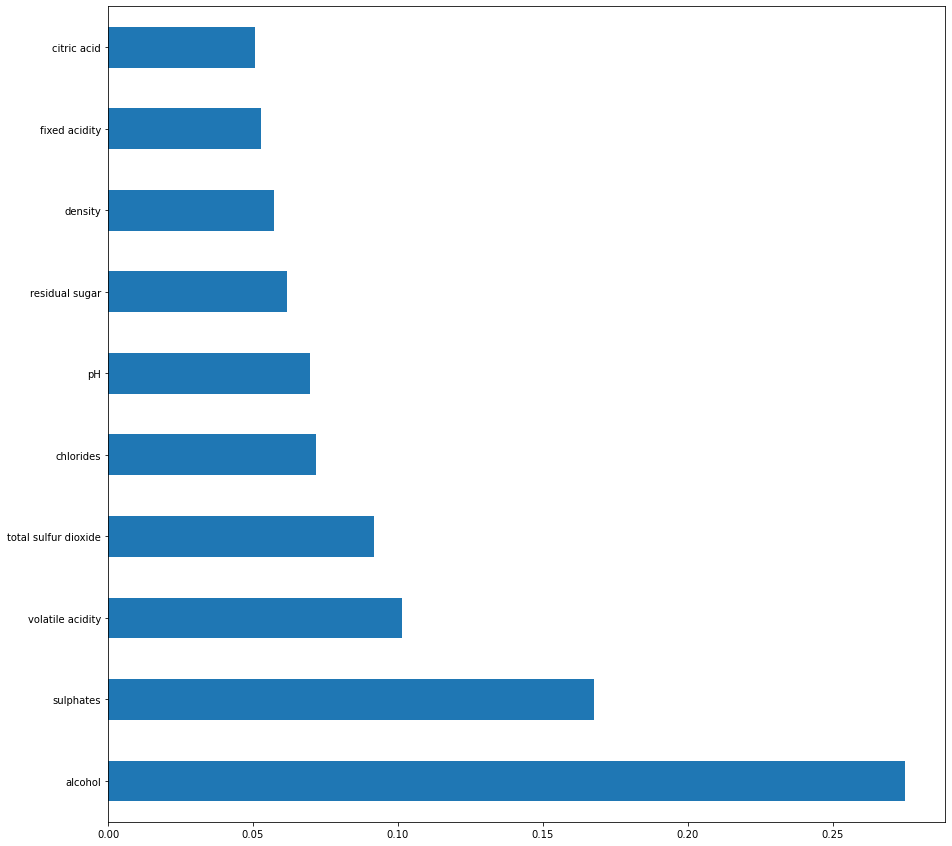

In [189]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(25).plot(kind='barh',figsize=(15,15))

#### Plot training loss and validation loss

#### Plot training accuracy and validation accuracy

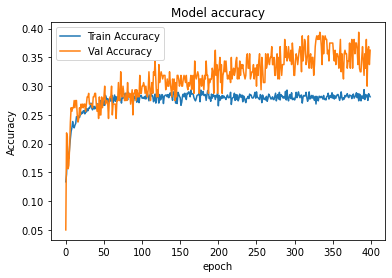

In [172]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

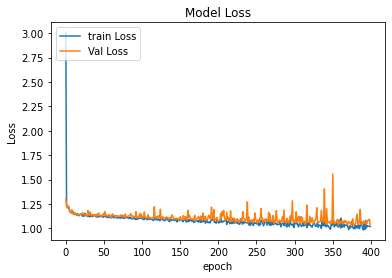

In [185]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train Loss', 'Val Loss'], loc='upper left')
plt.show()

#### Evaluate the classsification model using Precision, Recall and Accuracy metrics

Way 1:

In [202]:
def EvaluateClassificationModel(model, X, Y):
    
  
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, y_pred4))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, y_pred4)
    print("\nClassification Report:\n", class_report)
    


In [203]:
EvaluateClassificationModel(NeuralNetwork, X_train, Y_train)

Accuracy Score: 60.0

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.67      0.73      0.70        64
           6       0.56      0.61      0.58        66
           7       0.64      0.39      0.49        23
           8       0.00      0.00      0.00         2

    accuracy                           0.60       160
   macro avg       0.31      0.29      0.29       160
weighted avg       0.59      0.60      0.59       160



Way 2:

In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = round(accuracy_score(Y_test, y_pred4), 3)
precision = round(precision_score(Y_test, y_pred4, average='micro'), 3)
recall = round(recall_score(Y_test, y_pred4, average='micro'), 3)
print('Accuracy: {} / Precision: {} / Recall: {} '.format(accuracy*100, precision*100, recall*100))

Accuracy: 60.0 / Precision: 60.0 / Recall: 60.0 


### Conclusion

*TODO*

As shown above, we can see tht the accuracy and other metrics output used to evaluate the NN model used are better than the output of the metrics used to evaluate regression models. Hence, I can conclude that Neural Network did better in comparison to the regression models explored earlier in this notebook. I was able to find out the feature importance and conclude that alcohol is the most important feature as shown in my plot earlier. In addition, I explored the Accuracy and loss models for train and validation. We can see that, for Model Loss, as the epoch increase, the loss decreases and vise versa for the accuracy model. Note that this is what we desire and aim for!  

In conclusion, I strongly believe that this project was very fascinating and interesting. I was able to predict the red wine quality using different techniques. This is a very good example of how one can use machine learning and deep learning concepts such as NN to find solutions and answers to real world problems. Introduction to Machine Learning and Pattern Recognition is honestly by far my favorite course I've taken so far as It really interested me and challenged me to find the best approach and keep diging in. The way we are taugh this course by professor Archit is very valuable as he helped us understand various concepts, from EDA to very advanced models such as Neural Network Etc. Hence, I'd like to extend my many thanks and appreciation to professor Archit Garg and his respected TAs for all of their help throughout this term. I will definetly apply all of the materials learned in this course in the future as I strongly trust that it is an asset!


### The End - Thanks!